<h1>Lab | Random variable distributions</h1><br>

Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

<h2>Instructions</h2><br>

* 1. Get the numerical variables from our dataset.
* 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
* 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

## Import libraries and dependencies

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
import pylab

## Import the dataset

In [2]:
df = pd.read_csv("files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 1. Get the numerical variables from our dataset

In [3]:
numerical_df = df.select_dtypes(include='number')
numerical_df

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


## 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution

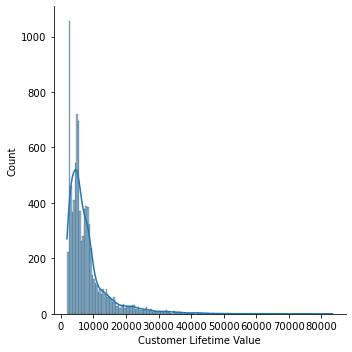

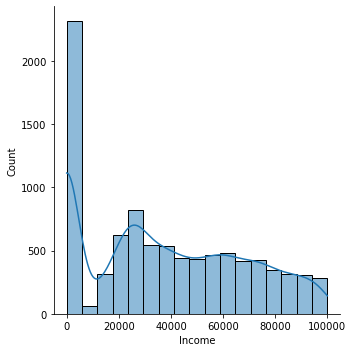

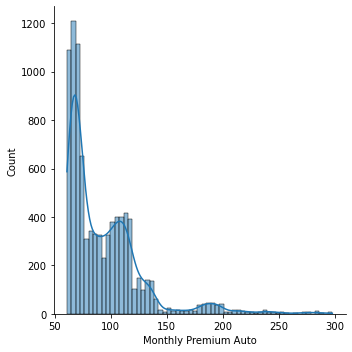

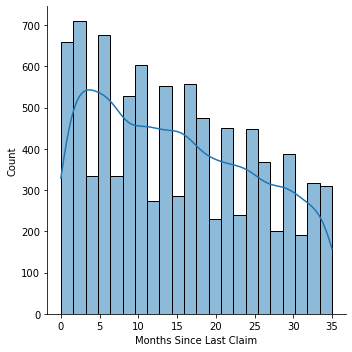

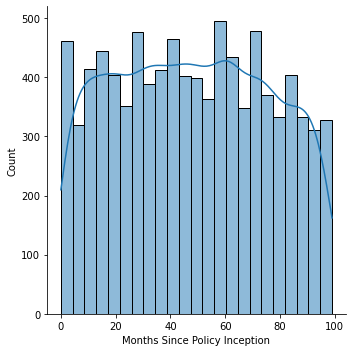

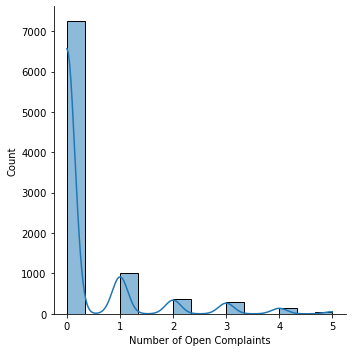

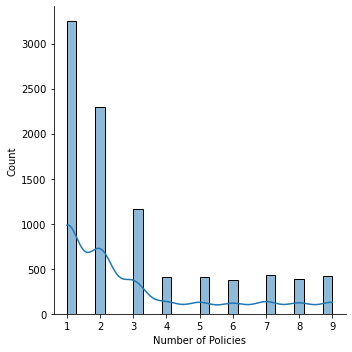

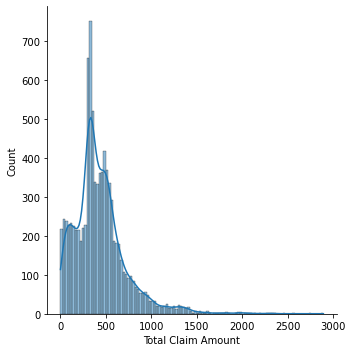

In [4]:
for variable in numerical_df.columns:
    sns.displot(numerical_df, x=variable, kde=True)
    plt.show()

>One can say that none of the previous plots show either normal nor exponential distribution. I'd say that the data, in general, is skewed

In [5]:
numerical_df.skew()

Customer Lifetime Value          3.032280
Income                           0.286887
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Total Claim Amount               1.714966
dtype: float64

* Based on the previous table we can conclude that only the features **'Income'**, **'Months Since Last Claim'** and **'Months Since Policy Inception'** can be considered **normal distributed** or Gaussian because their skewness is between -0.5 and 0.5


* Even tho **the rest** of the features show a skewgreater than 1 and they should be considered **highly positive skewed**, the features **'Number of Open Complaints'** and **'Number of Policies'** are considered **Poisson distributed**.

## 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result

In [6]:
# Creating a function that compares the original skewness of a feature to different transformations

def transformation_to_normal_distribution(data, feature):

    # Logarithmic Transformation
    
    print("")
    print("\033[1mLogarithmic Transformation – This will convert the feature value to its log value i.e log(feature)\033[0m")
    plt.figure(figsize=(18,5))
    plt.subplot(1,3,1)
    plt.title('Original shape')
    sns.kdeplot(data=data[feature], color='crimson', fill=True)
    plt.subplot(1,3,2)
    plt.title('Shape transformed')
    data[str(feature)+'_log'] = np.log(data[feature])
    sns.kdeplot(data=data[str(feature)+'_log'], color='limegreen', fill=True)
    plt.subplot(1,3,3)
    stats.probplot(data[str(feature)+'_log'],plot=pylab)
    print("The original skewness is {} and the {} transformation produces a skewness of {}"
          .format(round(data[feature].skew(),3), "Logarithmic", round(data[str(feature)+'_log'].skew(),3)))
    print("")
    plt.tight_layout()
    plt.show()
    
    # Reciprocal Transformation
    
    print("")
    print("\033[1mReciprocal Transformation – This will inverse values of feature i.e 1/feature\033[0m")
    plt.figure(figsize=(18,5))
    plt.subplot(1,3,1)
    plt.title('Original shape')
    sns.kdeplot(data=data[feature], color='crimson', fill=True)
    plt.subplot(1,3,2)
    plt.title('Shape transformed')
    data[str(feature)+'_reciprocal']=1/data[feature]
    sns.kdeplot(data=data[str(feature)+'_reciprocal'], color='limegreen', fill=True)
    plt.subplot(1,3,3)
    stats.probplot(data[str(feature)+'_reciprocal'],plot=pylab)
    print("The original skewness is {} and the {} transformation produces a skewness of {}"
          .format(round(data[feature].skew(),3), "Reciprocal", round(data[str(feature)+'_reciprocal'].skew(),3)))
    print("")
    plt.tight_layout()
    plt.show()
    
    # Square Root Transformation
    
    print("")
    print("\033[1mSquare Root Transformation – This transformation will take the square root of the feature column i.e sqrt(feature)\033[0m")
    plt.figure(figsize=(18,5))
    plt.subplot(1,3,1)
    plt.title('Original shape')
    sns.kdeplot(data=data[feature], color='crimson', fill=True)
    plt.subplot(1,3,2)
    plt.title('Shape transformed')
    data[str(feature)+'_sqroot']=np.sqrt(data[feature])
    sns.kdeplot(data=data[str(feature)+'_sqroot'], color='limegreen', fill=True)
    plt.subplot(1,3,3)
    stats.probplot(data[str(feature)+'_sqroot'],plot=pylab)
    print("The original skewness is {} and the {} transformation produces a skewness of {}"
          .format(round(data[feature].skew(),3), "Square Root", round(data[str(feature)+'_sqroot'].skew(),3)))
    print("")
    plt.tight_layout()
    plt.show()
    
    # Exponential Transformation
    
    print("")
    print("\033[1mExponential Transformation: The exponential value of the feature variable\033[0m")
    plt.figure(figsize=(18,5))
    plt.subplot(1,3,1)
    plt.title('Original shape')
    sns.kdeplot(data=data[feature], color='crimson', fill=True)
    plt.subplot(1,3,2)
    plt.title('Shape transformed')
    data[str(feature)+'_exponential']=data[feature]**(1/1.2)
    sns.kdeplot(data=data[str(feature)+'_exponential'], color='limegreen', fill=True)
    plt.subplot(1,3,3)
    stats.probplot(data[str(feature)+'_exponential'],plot=pylab)
    print("The original skewness is {} and the {} transformation produces a skewness of {}"
          .format(round(data[feature].skew(),3), "Exponential", round(data[str(feature)+'_exponential'].skew(),3)))
    print("")
    plt.tight_layout()
    plt.show()
    
    # Box-Cox Transformation
    
    print("")
    print("\033[1mBox-Cox Transformation\033[0m")
    plt.figure(figsize=(18,5))
    plt.subplot(1,3,1)
    plt.title('Original shape')
    sns.kdeplot(data=data[feature], color='crimson', fill=True)
    plt.subplot(1,3,2)
    plt.title('Shape transformed')
    data[str(feature)+'_Boxcox'],parameters=stats.boxcox(data[feature])
    sns.kdeplot(data=data[str(feature)+'_Boxcox'], color='limegreen', fill=True)
    plt.subplot(1,3,3)
    stats.probplot(data[str(feature)+'_Boxcox'],plot=pylab)
    print("The original skewness is {} and the {} transformation produces a skewness of {}"
          .format(round(data[feature].skew(),3), "Box-Cox", round(data[str(feature)+'_Boxcox'].skew(),3)))
    print("")
    
    plt.tight_layout()
    plt.show()


Logarithmic Transformation – This will convert the feature value to its log value i.e log(feature)
The original skewness is 3.032 and the Logarithmic transformation produces a skewness of 0.576



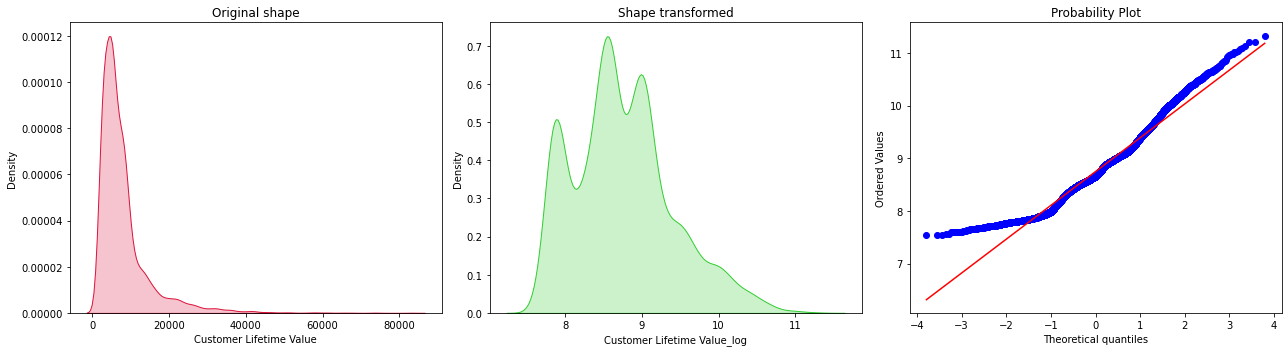


Reciprocal Transformation – This will inverse values of feature i.e 1/feature
The original skewness is 3.032 and the Reciprocal transformation produces a skewness of 0.695



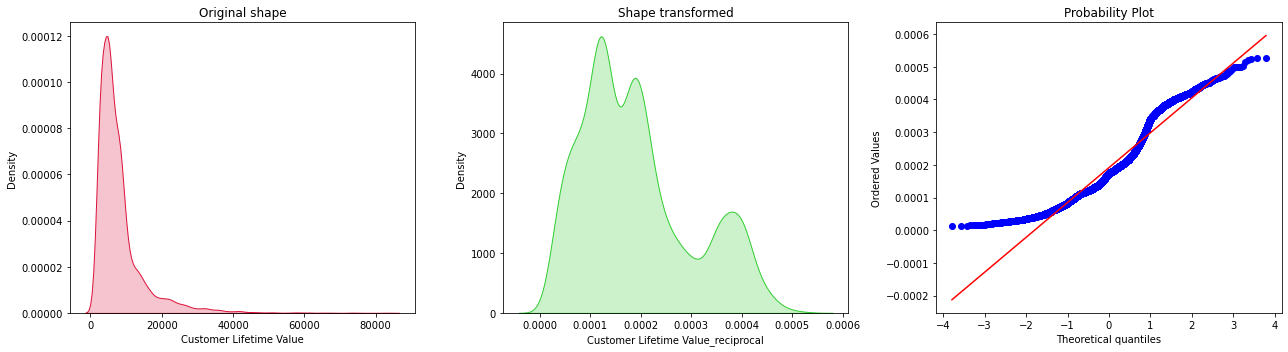


Square Root Transformation – This transformation will take the square root of the feature column i.e sqrt(feature)
The original skewness is 3.032 and the Square Root transformation produces a skewness of 1.589



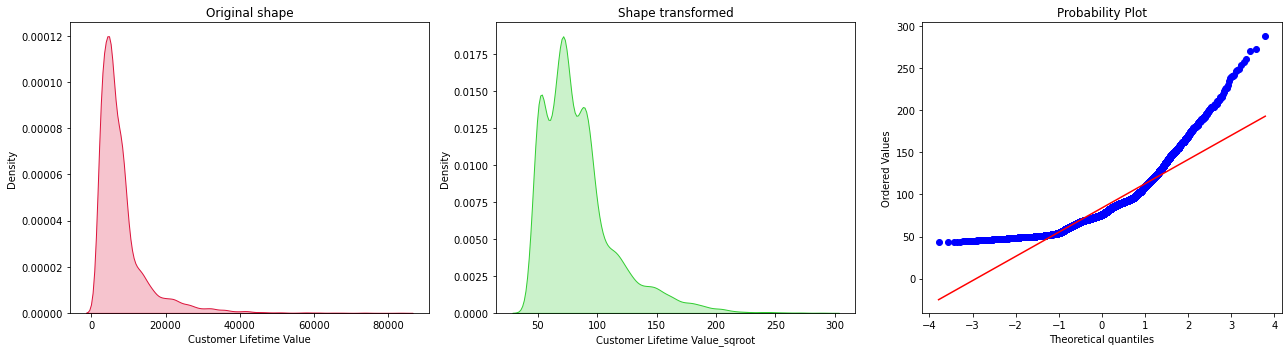


Exponential Transformation: The exponential value of the feature variable
The original skewness is 3.032 and the Exponential transformation produces a skewness of 2.488



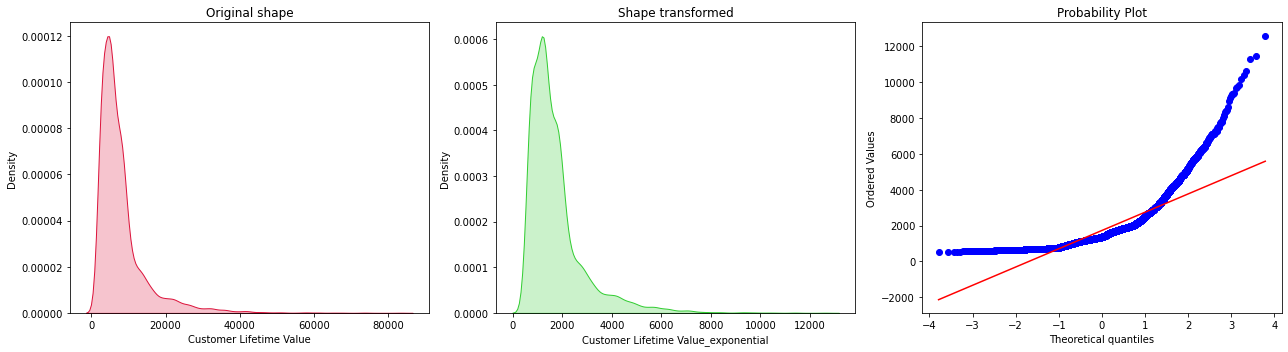


Box-Cox Transformation
The original skewness is 3.032 and the Box-Cox transformation produces a skewness of 0.044



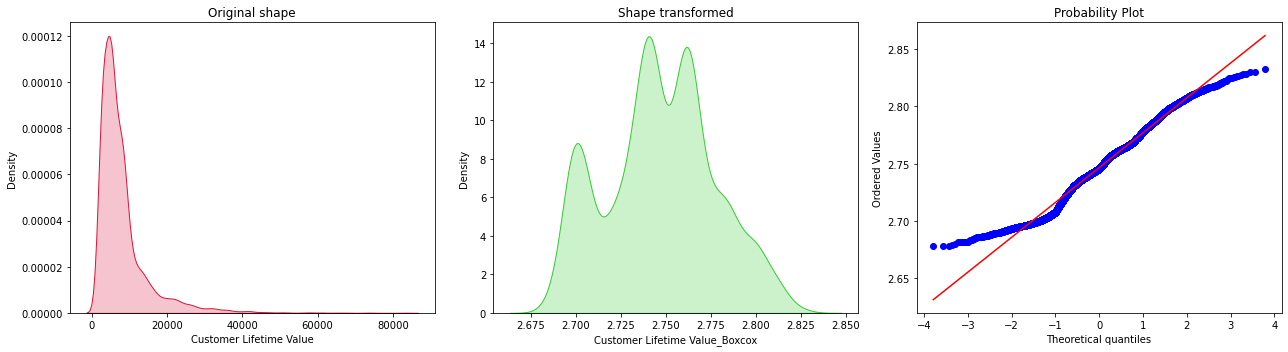

In [7]:
# Selecting the most skewed feature of numerical_df to show the results

transformation_to_normal_distribution(numerical_df, 'Customer Lifetime Value')

>As we can see on the previous plot, every one of the transformations applyed produces a change.</br>
The best transformation for the feature 'Customer Lifetime Value' is the **Box-Cox** transformation, letting a skewness of **0.044**